# Welkom bij de onderzoeks pipeline voor het vak Data Science.
----

### Dit onderzoek is opgezet door groep 6 van klas V2C:
- Sebastiaan Jansen
- Mustafa Toprak
- Skott de Koster

#### Dit data onderzoek is gebaseerd op de dataset over films. Het bevat een aantal onderzoeksvragen die wij zullen behandelen:
- In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
- Tot hoeverre variëren  de genres van de films waarin een acteur speelt verspreid over zijn/haar carrière?
- Hoeveel effect heeft de lengte van een trailer op de omzet van de film?
- Is een film succesvoller op basis van het aantal likes die een acteur (of acteurs) heeft/hebben op facebook?
- Welke regisseurs boeken de meeste winst?
- Wat is de totale winst van alle films per jaar?
 
Deze vragen zullen allemaal worden behandeld in dit onderzoek.

## Stap 1: Data collection
---

De dataset is aan ons gegeven door de Hogeschool Utrecht als onderdeel van de opdracht. Deze dataset houd een groot csv bestand in met onder andere de film titel, genre en een paar belangrijke acteurs. We hebben dus nu de data verzameld en gaan het nu inlezen.

---

## Stap 2: Data processing
---

We gaan nu de dataset inlezen en verwerken om het beter te kunnen bekijken. Om te beginnen importeren we de benodigde Python libraries:

In [14]:
# Deze libraries zijn voor het verwerken van de data.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Deze libraries zijn voor het verkrijgen van YouTube video gegevens, dit komt later aan bod.
import pafy
import youtube_dl
import datetime 

UsageError: Line magic function `%` not found.


Vervolgens lezen we de eerste (toegewezen) dataset in. Hiervoor gebruiken we pandas.read_csv en slaan we dit op in de dataframe "films". 
Aangezien de dataset erg groot is, laten we voor nu alleen de eerste 5 rijen zien. Dit doen we door een variabele "films_toegewezen" aan te maken en de dataset op te slaan als dataframe:

In [36]:
films_toegewezen = pd.read_csv('movie.csv', sep=",")
films_toegewezen = films_toegewezen.round(decimals=0).astype(object)
films_toegewezen.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723,178,0,855,Joel David Moore,1000,7.60506e+08,Action|Adventure|Fantasy|Sci-Fi,...,3054,English,USA,PG-13,2.37e+08,2009,936,8,2,33000
1,Color,Gore Verbinski,302,169,563,1000,Orlando Bloom,40000,3.09404e+08,Action|Adventure|Fantasy,...,1238,English,USA,PG-13,3e+08,2007,5000,7,2,0
2,Color,Sam Mendes,602,148,0,161,Rory Kinnear,11000,2.00074e+08,Action|Adventure|Thriller,...,994,English,UK,PG-13,2.45e+08,2015,393,7,2,85000
3,Color,Christopher Nolan,813,164,22000,23000,Christian Bale,27000,4.48131e+08,Action|Thriller,...,2701,English,USA,PG-13,2.5e+08,2012,23000,8,2,164000
4,NaN,Doug Walker,NaN,NaN,131,NaN,Rob Walker,131,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12,7,NaN,0


Hetzelfde doen we met de tweede (externe) dataset, deze noemen we "films_extern": 

In [3]:
films_extern = pd.read_csv('ml-youtube.csv', sep=",")
films_extern.head()

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)


We zien dus dat de eerste dataset bestaat uit 5043 films, dit moeten we nu combineren met de tweede dataset. Maar de tweede dataset heeft veel meer rows en een iets andere vorm van filmtitel. Dit moeten we dus oplossen, en ook de andere problemen zoals de NaN en duplicate waarden.

---

# Stap 3: Data cleaning
---

We gaan nu de data schoon maken. Om te beginnen schonen we de eerste dataset op door alle data die niet relevant is te verwijderen:

In [4]:
to_drop = ['color','facenumber_in_poster','country','aspect_ratio','language','content_rating','plot_keywords']
films_toegewezen.drop(to_drop, inplace=True, axis=1)

films_extern.drop('movieId', inplace=True, axis=1)

In [5]:
# We verwijderen de rijen met NaN gegevens in beide datasets, aangezien dit data is die we niet kunnen gebruiken.
films_toegewezen = films_toegewezen.dropna()
films_extern = films_extern.dropna()

In [6]:
# We halen alle duplicates eruit.
films_toegewezen = films_toegewezen.drop_duplicates(subset="movie_title")
films_extern = films_extern.drop_duplicates(subset="title")

In [7]:
# We slicen de laatste 7 characters van de title column (het jaar dat de film uitkwam) in de tweede dataset weg,
# zodat de column overeen komt met de column in de eerste dataset.
# Ook halen we een whitespace weg in de eerste dataset die er niet in hoort te zitten.
films_toegewezen.update(films_toegewezen['movie_title'].str[:-1])
films_extern.update(films_extern['title'].str[:-7])

In [8]:
# We setten de indexes van beide datasets naar de titel van de films.
films_toegewezen.set_index('movie_title', inplace=True)
films_extern.set_index('title', inplace=True)

In [9]:
# We sorteren beide datasets zodat de waardes gelijk zullen zijn.
films_toegewezen = films_toegewezen.sort_index()
films_extern = films_extern.sort_index()

Nu ziet de eerste dataset er zo uit:

In [10]:
films_toegewezen.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,num_voted_users,cast_total_facebook_likes,actor_3_name,movie_imdb_link,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,
10 Cloverfield Lane,Dan Trachtenberg,411.0,104.0,16.0,82.0,John Gallagher Jr.,14000.0,71897215.0,Drama|Horror|Mystery|Sci-Fi|Thriller,Bradley Cooper,126893,14504,Sumalee Montano,http://www.imdb.com/title/tt1179933/?ref_=fn_t...,440.0,15000000.0,2016.0,338.0,7.3,33000
10 Days in a Madhouse,Timothy Hines,1.0,111.0,0.0,247.0,Kelly LeBrock,1000.0,14616.0,Drama,Christopher Lambert,314,2059,Alexandra Callas,http://www.imdb.com/title/tt3453052/?ref_=fn_t...,10.0,12000000.0,2015.0,445.0,7.5,26000
10 Things I Hate About You,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,Comedy|Drama|Romance,Joseph Gordon-Levitt,222099,37907,Andrew Keegan,http://www.imdb.com/title/tt0147800/?ref_=fn_t...,549.0,16000000.0,1999.0,13000.0,7.2,10000
102 Dalmatians,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,Adventure|Comedy|Family,Ioan Gruffudd,26413,4182,Jim Carter,http://www.imdb.com/title/tt0211181/?ref_=fn_t...,77.0,85000000.0,2000.0,795.0,4.8,372
10th & Wolf,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,Crime|Drama|Thriller,Brian Dennehy,5557,2512,Dash Mihok,http://www.imdb.com/title/tt0360323/?ref_=fn_t...,34.0,8000000.0,2006.0,551.0,6.4,294


En ziet de tweede dataset er zo uit:

In [11]:
films_extern.head()

,youtubeId
title,
"""Great Performances"" Cats",fpIzXaJS18s
#chicagoGirl: The Social Network Takes on a Dictator,Dq31M_MUtU4
$ (Dollars),yDLMPb9rspo
$5 a Day,DsC3fxNTyno
$9.99,Ls4t_y6lTUo


Nu gaan we beide datasets samenvoegen tot 1 dataframe, deze noemen we 'films'. Het idee is om de youtubeId column van de tweede dataset te verwerken in de eerste dataset.

In [12]:
# Omdat de youtubeId column het enige is wat relevant is, is dat ook het enige veld dat we toevoegen. 
# De indexes van de eerste en tweede dataset worden samengevoegd tot 1 index genaamd title.
films = pd.merge(films_toegewezen, films_extern, left_index=True, right_index=True)
films.index.name = 'title'
films

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,cast_total_facebook_likes,actor_3_name,movie_imdb_link,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,youtubeId
title,,,,,,,,,,,,,,,,,,,,,
10 Things I Hate About You,Gil Junger,133.0,97.0,19.0,835.0,Heath Ledger,23000.0,38176108.0,Comedy|Drama|Romance,Joseph Gordon-Levitt,...,37907,Andrew Keegan,http://www.imdb.com/title/tt0147800/?ref_=fn_t...,549.0,16000000.0,1999.0,13000.0,7.2,10000,wRo7iUQMcTM
102 Dalmatians,Kevin Lima,84.0,100.0,36.0,439.0,Eric Idle,2000.0,66941559.0,Adventure|Comedy|Family,Ioan Gruffudd,...,4182,Jim Carter,http://www.imdb.com/title/tt0211181/?ref_=fn_t...,77.0,85000000.0,2000.0,795.0,4.8,372,cGHh59Oj8eU
10th & Wolf,Robert Moresco,26.0,107.0,53.0,463.0,Brad Renfro,954.0,53481.0,Crime|Drama|Thriller,Brian Dennehy,...,2512,Dash Mihok,http://www.imdb.com/title/tt0360323/?ref_=fn_t...,34.0,8000000.0,2006.0,551.0,6.4,294,12wdi73Kbxk
12 Rounds,Renny Harlin,113.0,108.0,212.0,347.0,Ashley Scott,969.0,12232937.0,Action|Crime|Thriller,Taylor Cole,...,2799,Nick Gomez,http://www.imdb.com/title/tt1160368/?ref_=fn_t...,113.0,22000000.0,2009.0,794.0,5.6,0,Mp3Aqe8FrNE
12 Years a Slave,Steve McQueen,597.0,134.0,0.0,500.0,Scoot McNairy,2000.0,56667870.0,Biography|Drama|History,Quvenzhané Wallis,...,4251,Taran Killam,http://www.imdb.com/title/tt2024544/?ref_=fn_t...,695.0,20000000.0,2013.0,660.0,8.1,83000,v2fDTOdWuQQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander,Ben Stiller,135.0,90.0,0.0,8000.0,Alexander Skarsgård,14000.0,45162741.0,Comedy,Milla Jovovich,...,34565,Will Ferrell,http://www.imdb.com/title/tt0196229/?ref_=fn_t...,523.0,28000000.0,2001.0,10000.0,6.6,0,t1krvnjzV4w
Zoom,Peter Hewitt,63.0,83.0,12.0,690.0,Rip Torn,2000.0,11631245.0,Action|Adventure|Family|Sci-Fi,Kevin Zegers,...,5022,Thomas F. Wilson,http://www.imdb.com/title/tt0383060/?ref_=fn_t...,113.0,35000000.0,2006.0,826.0,4.2,494,5y7q5b3WyEc
eXistenZ,David Cronenberg,196.0,115.0,0.0,716.0,Sarah Polley,1000.0,2840417.0,Horror|Sci-Fi|Thriller,Jennifer Jason Leigh,...,2990,Callum Rennie,http://www.imdb.com/title/tt0120907/?ref_=fn_t...,527.0,31000000.0,1999.0,900.0,6.8,6000,IEuykd38iNE


Je kunt zien dat er 2837 films zijn. Dit is bijna de helft minder dan er in de oorspronkelijke eerste dataset stond, dit is omdat we de onbruikbare data hebben verwijderd en er alleen bruikbare data is overgebleven.
We gaan de gemergede dataset nu verkennen en analyseren.

---

# 4. Data exploration & analysis
---

Om de data te herkennen en er een betere grip op te krijgen zullen wij een paar commando's loslaten op de verwerkte data. Als eerste zullen wij een .describe gebruiken om een overzicht te krijgen van alle info van de numerieke waardes. Op deze manier kunnen wij bijvoorbeeld de gemiddelde lengte van een film zien. Dit is bij deze dataset dus 105 minuten.

In [13]:
films.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
count,2837.000000,2837.000000,2837.000000,2837.000000,2837.000000,2.837000e+03,2.837000e+03,2837.000000,2837.000000,2.837000e+03,2837.000000,2837.000000,2837.000000,2837.000000
mean,162.619669,109.528375,887.810716,717.822348,7747.240042,5.299862e+07,1.047401e+05,11357.681001,334.709552,3.953839e+07,2002.534367,1928.906239,6.429926,8072.237575
std,120.431056,22.237189,3217.599321,1646.508893,16062.912634,7.036101e+07,1.463639e+05,18864.744983,399.590754,5.119574e+07,9.904941,3867.038027,1.054146,19313.750489
min,2.000000,53.000000,0.000000,0.000000,0.000000,1.332000e+03,9.100000e+01,0.000000,2.000000,2.180000e+02,1927.000000,0.000000,1.600000,0.000000
25%,75.000000,95.000000,11.000000,221.000000,756.000000,8.586376e+06,1.939700e+04,1987.000000,110.000000,1.000000e+07,1999.000000,405.000000,5.800000,0.000000
50%,134.000000,105.000000,65.000000,450.000000,1000.000000,3.030780e+07,5.410100e+04,4121.000000,210.000000,2.500000e+07,2004.000000,697.000000,6.500000,131.000000
75%,219.000000,119.000000,241.000000,695.000000,13000.000000,6.855866e+07,1.274970e+05,16179.000000,398.000000,5.000000e+07,2009.000000,982.000000,7.200000,10000.000000
max,775.000000,325.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.676169e+06,656730.000000,4667.000000,1.100000e+09,2016.000000,29000.000000,9.000000,349000.000000


Om de data verder te verkennen en een beter gevoel te krijgen kunnen wij gebruik maken van grafieken. Zo staat hieronder bijvoorbeeld een staafdiagram van het aantal films per jaartal. In de x as staat het jaartal, deze zijn gesorteerd bij hoeveel films er in dat jaartal zijn uitgekomen die in deze dataset staan. De meeste films uit deze dataset komen dus uit 2002.

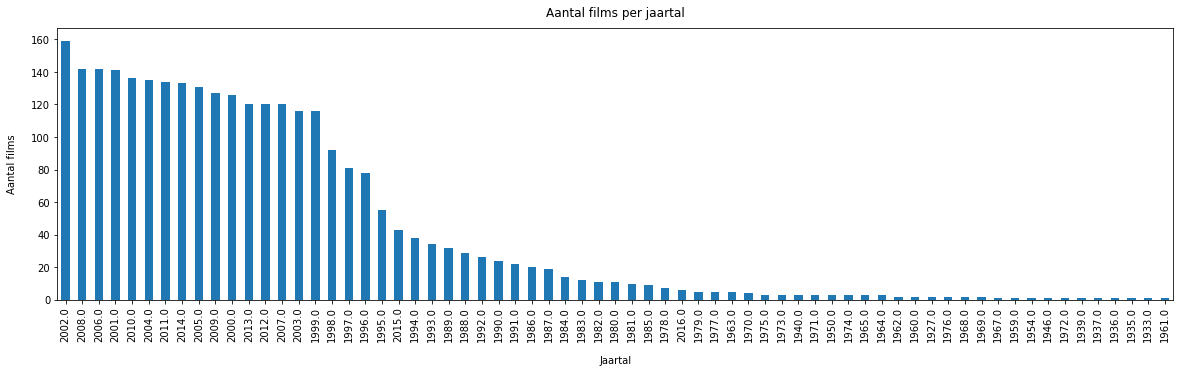

In [54]:
films['title_year'].value_counts().plot(kind='bar', width=0.5,figsize=(20,5));
plt.xlabel("Jaartal", labelpad=14)
plt.ylabel("Aantal films", labelpad=14)
plt.title("Aantal films per jaartal", y=1.02);